# Calculadora de Aluguel em São Paulo / SP

Usando uma base de dados disponível no Kaggle referente ao mercado imobiliário de São Paulo no ano de 2019 foi desenvolvida uma calculadora do valor do aluguel de apartamentos situados no município de São Paulo, a partir de um modelo de machine learning baseado em uma série de features, tais como: tamanho, número de quartos, suites, localização, latitude, logintude, etc... o modelo retorna o valor estimado do aluguel do imóvel.

## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

## Baixando Arquivo CSV - Base de Dados

In [2]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')

In [3]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


## Limpeza e Análise dos Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

É possível verificar que temos dezesseis variáveis sendo onze numéricas (inteiro), três categóricas (strings) e duas numéricas (decimais).

In [5]:
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

Nenhuma das variáveis apresenta valores nulos, ou seja, todas as linhas estão devidamente preenchidas, porém é necessário verificar se existem valores inconsistentes.

In [6]:
df.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df['Rooms'].unique()

array([ 2,  1,  3,  4,  5, 10,  6,  7], dtype=int64)

In [8]:
df['Toilets'].unique()

array([2, 3, 4, 1, 5, 6, 7, 8], dtype=int64)

In [9]:
df['Suites'].unique()

array([1, 3, 2, 4, 0, 5, 6], dtype=int64)

In [10]:
df['Parking'].unique()

array([1, 2, 3, 4, 5, 6, 8, 9, 0, 7], dtype=int64)

In [11]:
df['Elevator'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Furnished'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Swimming Pool'].unique()

array([0, 1], dtype=int64)

In [14]:
df['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

In [15]:
df['Negotiation Type'].unique()

array(['rent', 'sale'], dtype=object)

In [16]:
df['Property Type'].unique()

array(['apartment'], dtype=object)

como base nos resultados apresentados para cada uma das variáveis avaliadas acima, vemos que não há nenhum valor que possa ser considerado inconsistente, de modo que esses dados podem ser validados para utilização em um modelo de machine learning. A tratativa dos dados de latitude e longitude precisa ser feito de forma diferenciada, visto se tratar de variável númerica contínua.

In [17]:
mapa = folium.Map(location=[-23.55,-46.63], zoom_start=11)
mapa.add_child(folium.LatLngPopup())

Através da biblioteca folium foi cridada uma variável mapa inicializada com as coordenadas do centro da cidade de São Paulo e também foi adicionada a funcionalidade de exibição das coordenadas geográficas ao clicar no mapa.

A análise da variável District mostrou que todos os distritos pertencem à cidade de São Paulo, portanto ao plotar os dados em um mapa de calor espera-se que todos os pontos fiquem dentro dos limites do município.

In [18]:
coordenadas=[]
for lat,lng in zip(df.Latitude.values,df.Longitude.values):
  coordenadas.append([lat,lng])

O código acima cria uma lista de uma lista de pares de latitude e longitude do data frame analisado. Cada par de valores define um ponto no mapa que será plotado para geração do mapa de calor, onde conforme mencionado, espera-se que todos estejam dentro dos limites do município de São Paulo.

In [19]:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

Podemos ver que existem dados inconsistentes. São dados relativos a outros municípios e até mesmo dados cujas coordenadas não tem relação com município nenhum. A grande maioria dos dados está de fato dentro dos limites aproximados da cidade de São Paulo. 

Vamos criar um filtro que circunscreve a grande área vermelha, criando um quadrado entorno do município de São Paulo, o qual conterá esses dados válidos para o modelo de machine learning.

In [20]:
dfl = df[((df['Latitude'] > -23.7825) & (df['Latitude'] < -23.3895)) & ((df['Longitude'] > -46.8182) & (df['Longitude'] < -46.3620))]

In [21]:
dfl.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [22]:
coordenadas_novas=[]
for lat,lng in zip(dfl.Latitude.values,dfl.Longitude.values):
  coordenadas_novas.append([lat,lng])

In [23]:
mapa_limpo = folium.Map(location=[-23.55,-46.63], zoom_start=11)

In [24]:
mapa_limpo.add_child(plugins.HeatMap(coordenadas_novas))        
mapa_limpo

Agora temos os dados que estão restritos aos limites do município de São Paulo

Considerando que a coluna Property Type tem apenas um valor para todos os registros podemos deleta-la. Considerando também que a localização dos imóveis por coordenada é muito mais refinada que a localização por distrito, podemos deletar a coluna distrito. Ressalta-se também o fato de que a coluna distrito é do tipo categórica e portanto precisaria ser tratada para ser utilizada no modelo de machine learning através do "one-hot-encoding" o que geraria uma quantidade enorme de colunas levando o Jupyter Notebook a quebrar. 

In [25]:
dfl_new = dfl.drop(['Property Type', 'District'], axis= 1)

In [26]:
dfl_new

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Negotiation Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,rent,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,rent,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,rent,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,rent,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,rent,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,sale,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,sale,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,sale,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,sale,-23.652060,-46.637046


Considerando que nos interessa apenas os imóvies cuja transação seja aluguel e não venda, vamos criar um novo dataframe onde a coluna negociation type tem o valor rent e posteriomente podemos deletar essa coluna.

In [27]:
dfrent = dfl_new[dfl_new['Negotiation Type'] == 'rent']

In [28]:
dfrent = dfrent.drop(['Negotiation Type'], axis=1)

In [29]:
dfrent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204,17000,2200,240,4,5,4,5,0,0,0,0,-23.609608,-46.693013
11205,3700,595,73,1,2,1,1,0,0,1,0,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,-23.606891,-46.695934
11208,5000,2354,205,3,2,1,2,1,0,0,0,-23.612287,-46.681482


Agora precisamso fazer uma análise descritiva das variáveis Price, Condo e Size para verificar se existem valores inconsistentes 

In [30]:
dfrent[['Price', 'Condo', 'Size']].describe()

,Price,Condo,Size
count,6710.000000,6710.000000,6710.000000
mean,3108.932936,834.526677,90.067660
std,3580.506472,845.081109,63.981211
min,480.000000,0.000000,30.000000
25%,1380.000000,399.250000,52.000000
50%,2000.000000,600.000000,68.000000
75%,3300.000000,1000.000000,101.000000
max,50000.000000,9500.000000,880.000000


Observando os valores máximos, mínimos e médios dessas variáveis vemos que não há dados inconsistentes.

Agora vamos analisar a correlação de Pearson. O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. Se a associação entre os elementos não for linear, o coeficiente não será representado adequadamente. ... Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

Valores positivos próximos de 1 indicam forte correlação positiva e valores negativos próximos de -1 indicam forte correlação negativa. Valores próximos de zero indicam que é muito fraca.

<AxesSubplot:>

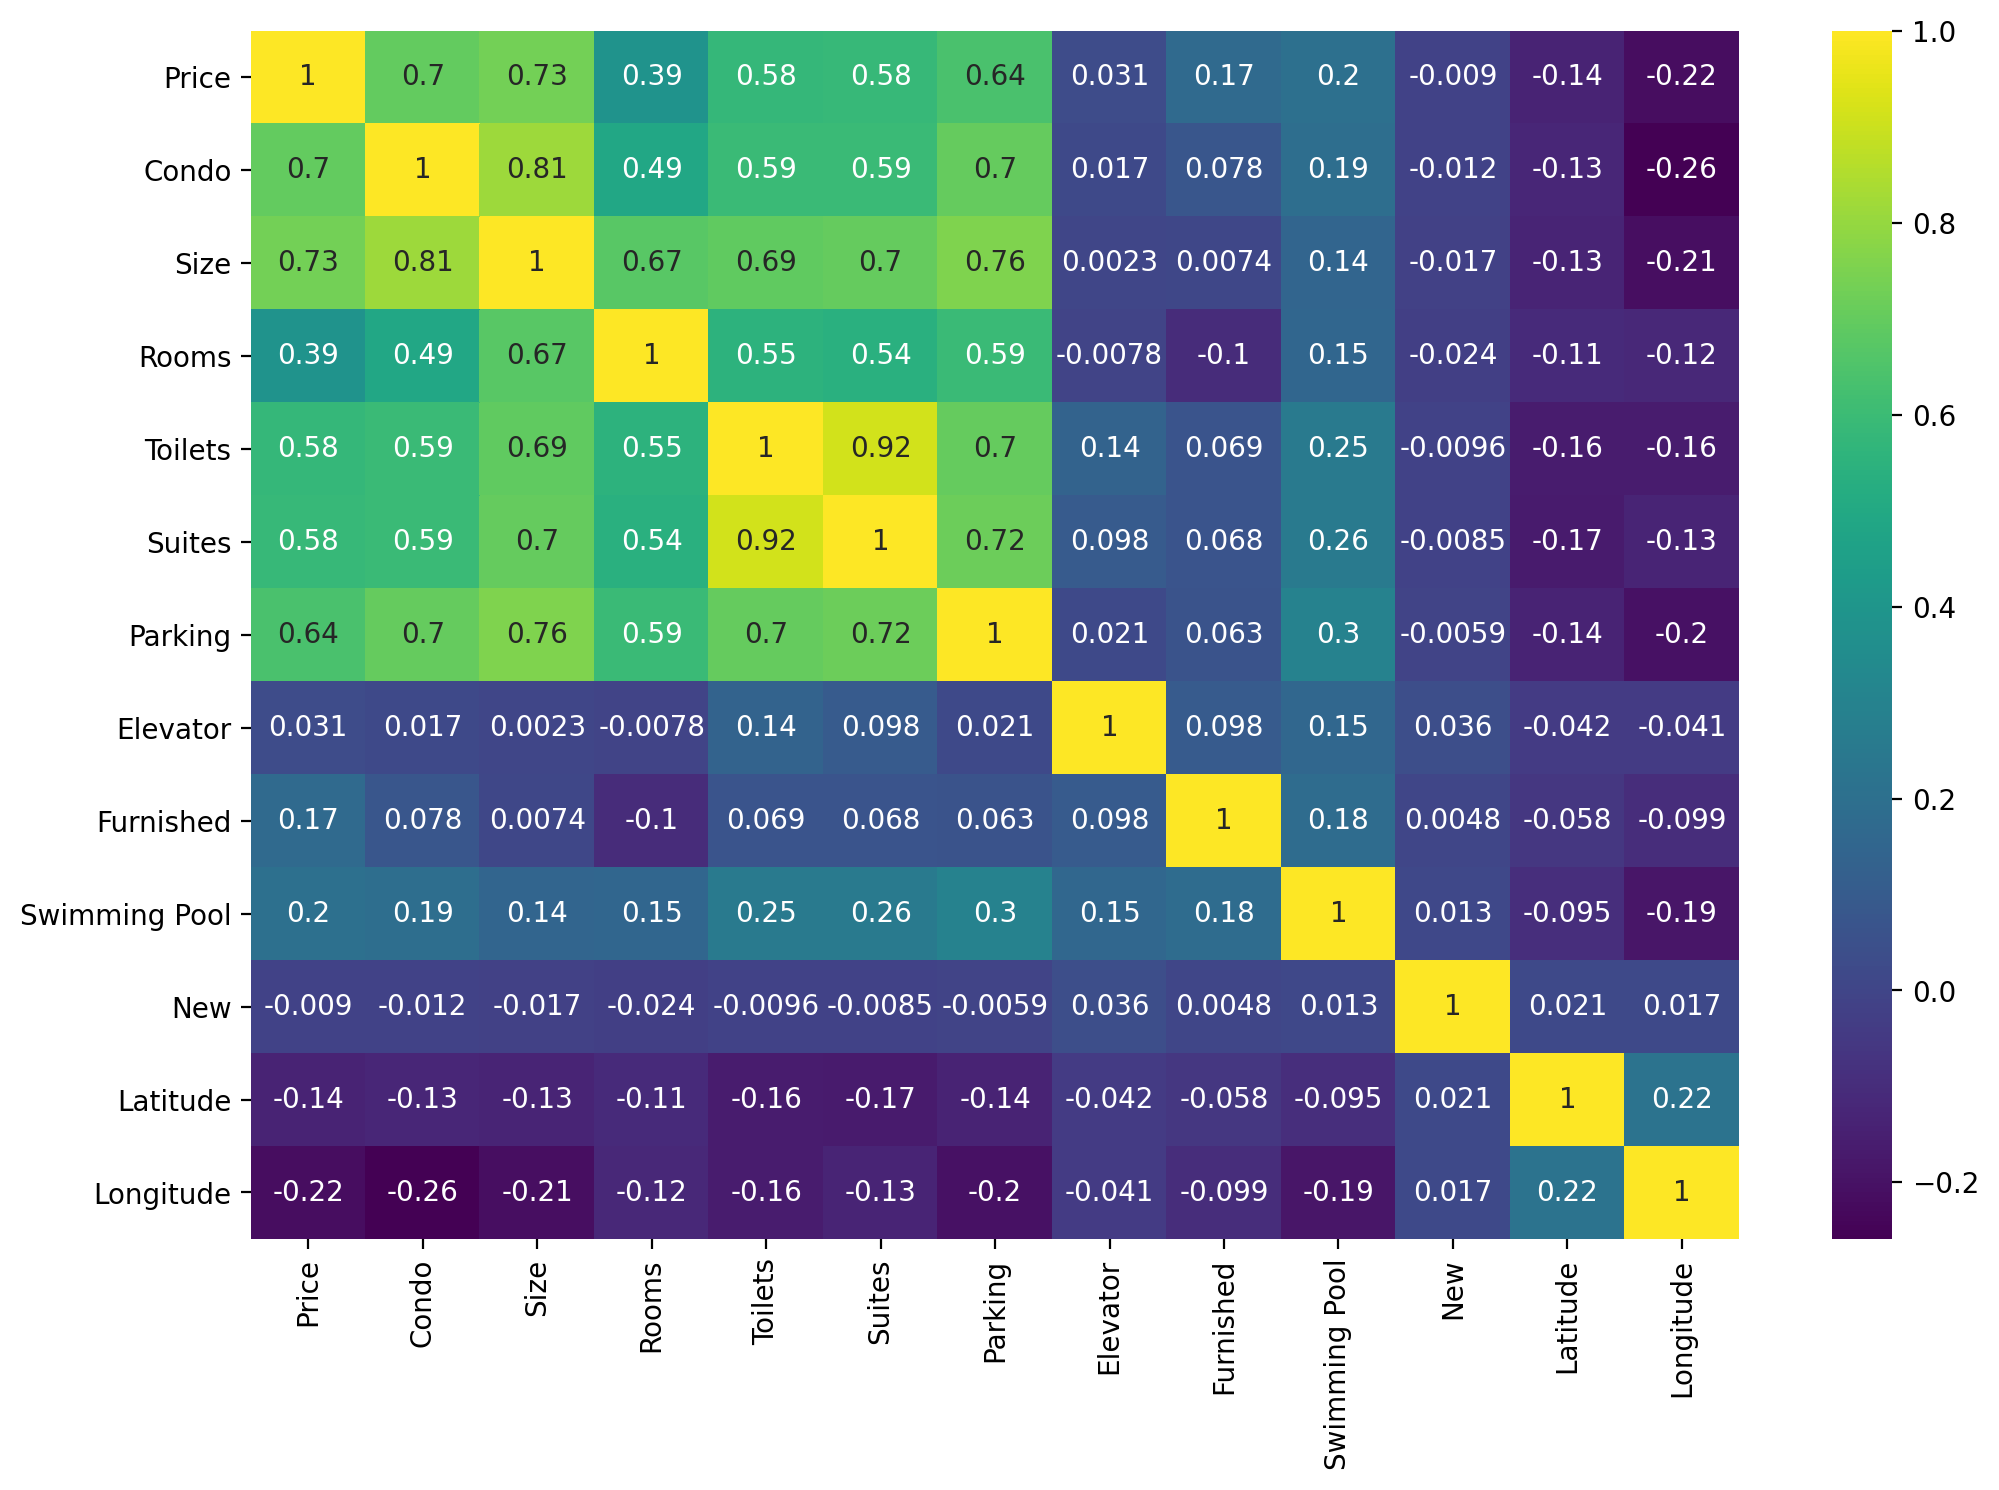

In [31]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(dfrent.corr(),cmap='viridis',annot=True)

A variável Price será o nosso target no modelo de machine learning, portanto nos interessa a correlação desta, com as demais variáveis que irão alimentar o modelo.

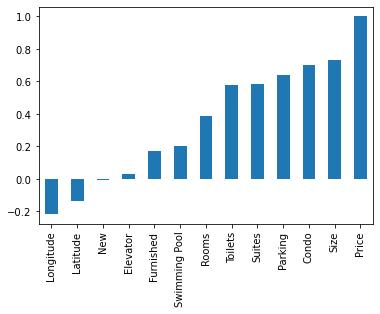

In [32]:
dfrent.corr()['Price'].sort_values().plot.bar();

vemos aqui que as variáveis New e Elevator apresentam coeficientes próximos de zero, portanto tem fraca correlação com nossa variável target 'Price', de modo que podemos deleta-las, não sendo estas relevantes para a criação do modelo de machine learning.

In [33]:
dfr = dfrent.drop(['New', 'Elevator'], axis=1)

In [34]:
dfr

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Furnished,Swimming Pool,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,0,0,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...
11204,17000,2200,240,4,5,4,5,0,0,-23.609608,-46.693013
11205,3700,595,73,1,2,1,1,0,1,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,-23.606891,-46.695934
11208,5000,2354,205,3,2,1,2,0,0,-23.612287,-46.681482


Vemos que a variável Size (tamanho) é a que mais influencia no Price (valor do aluguel), assim para fazermos uma analise de outliers é importante criamos uma nova variável PriceM2 = Price / Size, ou seja, valor do aluguel por metro quadrado, assim evitamos de remover imóveis que tem valor de alguel muito alto, mas porque são muito grandes e nesse caso não seriam, de fato, outliers.

In [35]:
dfr['PriceM2'] = round(dfr['Price'] / dfr['Size'],2)

In [36]:
dfr

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Furnished,Swimming Pool,Latitude,Longitude,PriceM2
0,930,220,47,2,2,1,1,0,0,-23.543138,-46.479486,19.79
1,1000,148,45,2,2,1,1,0,0,-23.550239,-46.480718,22.22
2,1000,100,48,2,2,1,1,0,0,-23.542818,-46.485665,20.83
3,1000,200,48,2,2,1,1,0,0,-23.547171,-46.483014,20.83
4,1300,410,55,2,2,1,1,0,0,-23.525025,-46.482436,23.64
...,...,...,...,...,...,...,...,...,...,...,...,...
11204,17000,2200,240,4,5,4,5,0,0,-23.609608,-46.693013,70.83
11205,3700,595,73,1,2,1,1,0,1,-23.617682,-46.694963,50.68
11206,21000,3000,208,4,4,3,3,1,1,-23.606891,-46.695934,100.96
11208,5000,2354,205,3,2,1,2,0,0,-23.612287,-46.681482,24.39


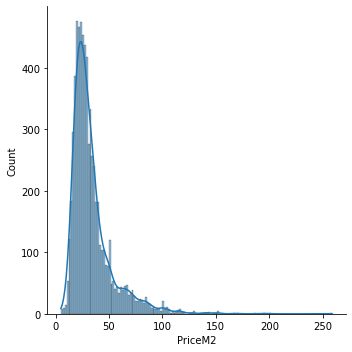

In [37]:
sns.displot(data=dfr, x='PriceM2', kde=True);

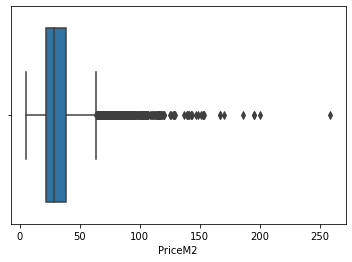

In [38]:
sns.boxplot(data=dfr, x='PriceM2');

Os dois gráficos acima nos mostram a existência de outliers no valor do aluguel por metro quadrado. Então vamos remover esses valores, que estatisticamente são definidos como valores acima de 1,5 vezes a distância interquartil mais a média.

In [39]:
iqr = (1.5 * (dfr['PriceM2'].quantile(.75) - dfr['PriceM2'].quantile(.25))) + dfr['PriceM2'].mean()

In [40]:
iqr = round(iqr, 2)
iqr

59.03

Registros com aluguel acima de 59,03 por metro quadrado serão removidos do dataframe.

In [41]:
dfr = dfr[dfr['PriceM2'] < 59.03]
dfr

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Furnished,Swimming Pool,Latitude,Longitude,PriceM2
0,930,220,47,2,2,1,1,0,0,-23.543138,-46.479486,19.79
1,1000,148,45,2,2,1,1,0,0,-23.550239,-46.480718,22.22
2,1000,100,48,2,2,1,1,0,0,-23.542818,-46.485665,20.83
3,1000,200,48,2,2,1,1,0,0,-23.547171,-46.483014,20.83
4,1300,410,55,2,2,1,1,0,0,-23.525025,-46.482436,23.64
...,...,...,...,...,...,...,...,...,...,...,...,...
11200,3000,610,51,1,1,0,1,1,1,-23.622137,-46.694020,58.82
11201,13000,2153,258,3,4,3,4,1,0,-23.619481,-46.684028,50.39
11203,9000,1950,168,3,4,3,3,1,0,-23.624600,-46.685282,53.57
11205,3700,595,73,1,2,1,1,0,1,-23.617682,-46.694963,50.68


Agora que temos o dataframe tratado, com todos os dados limpos, podemos criar o nosso modelo de machine learning. 

# Machine Learning - Polynomial Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

Dividindo o dataframe em dois: Train Data e Test Data

In [43]:
X = dfr.drop('PriceM2', axis=1)

In [44]:
y = dfr['PriceM2']

Como a variável target é do tipo numérica real então o modelo escolhido foi de regressão linear (polinomial) com aplicação da técnica de grid search para determinação do melhor grau do polinômio a ser aplicado. Obviamente que quanto maior o grau do polinômio menor será o erro nos dados de treino, porém é preciso comparar o erro nos dados de teste, para evitar o overfitting - técnica conhecida como elbow method.

In [45]:
train_rmse_erros = []
test_rmse_erros = []

for d in range(1,4):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
   
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_erros.append(train_rmse)
    test_rmse_erros.append(test_rmse)

In [46]:
train_rmse_erros

[5.467324326151295, 2.8209508584225564, 1.3138115152477514]

In [47]:
test_rmse_erros

[5.52469115906535, 3.505937218008963, 3.5118639618995218]

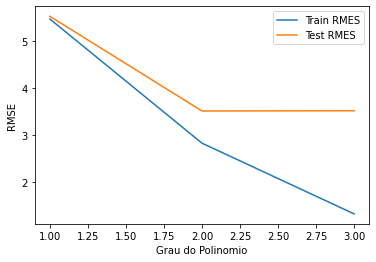

In [48]:
plt.plot(range(1,4),train_rmse_erros,label='Train RMES' )
plt.plot(range(1,4),test_rmse_erros,label='Test RMES' )
plt.xlabel('Grau do Polinomio')
plt.ylabel('RMSE')
plt.legend();

O polinômio de grau 2 é oque melhor se ajusta aos dados. Acima deste valor o erro nos dados de teste aumenta muito.

In [49]:
poly_converter = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

RMSE

5.52469115906535

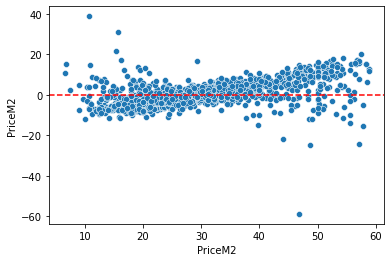

In [50]:
residual = y_test - y_pred
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color='red', ls='--');

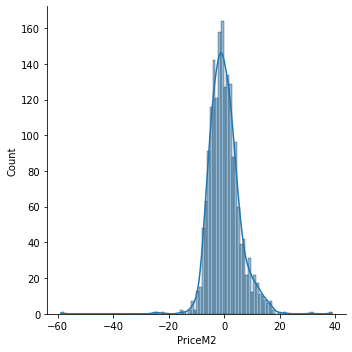

In [51]:
sns.displot(residual, bins=100, kde=True);

In [52]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),2)

0.71

## Conclusão

O modelo apresentou um valor de R2 (R Quadrado) de 0,71 o que equivale a dizer que a variação do preço do aluguel de um imóvel em São Paulo pode ser explicada em 70% pelas features do respectivo modelo, ou que esse modelo é 71% melhor do que simplesmente fazer a média dos valores.